In [134]:
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf

In [135]:
df = pd.read_csv('train.csv')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [137]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [139]:
df.dropna(inplace=True)

In [140]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


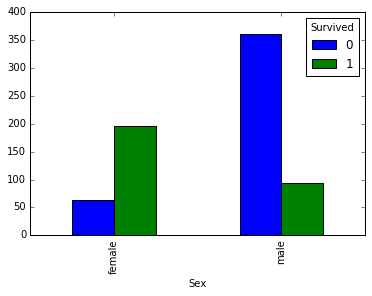

In [149]:
agg =df.groupby(by=['Sex','Survived']).apply(len)
agg.unstack().plot(kind='bar')

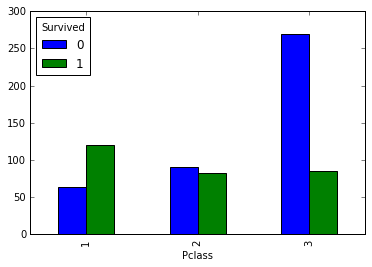

In [208]:
agg =df.groupby(by=['Pclass','Survived']).apply(len)
agg.unstack().plot(kind='bar')

# Comparison of Odds to Basic LogR Model

In [164]:
df.groupby(by=['Survived']).apply(len)

Survived
0    424
1    288
dtype: int64

In [176]:
from __future__ import division
np.log(df.Survived.value_counts()[1]/df.Survived.value_counts()[0])

-0.38677297509601188

In [206]:
est = smf.logit('Survived ~ 1',data=df)
est = est.fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.674792
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            0
Date:                Thu, 29 Sep 2016   Pseudo R-squ.:                   0.000
Time:                        11:02:59   Log-Likelihood:                -480.45
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3868      0.076     -5.065      0.000        -0.536    -0.237
==============================================================================
"""

# Basic LogR Model with 1 dichotomous variable

In [183]:
agg = df.groupby(by=['Survived','Sex']).apply(len).unstack()['male']
np.log(agg[1]/agg[0])

-1.3535045382968995

In [186]:
agg2 = df.groupby(by=['Survived','Sex']).apply(len).unstack()['female']
np.log(agg[1]/agg[0])

1.1141164752040749

In [207]:
est = smf.logit('Survived ~ 1+Sex',data=df)# + I(Age<18) + C(Embarked) + Fare',data = df)
est = est.fit()
est.summary()
#Talk about Pclass after (thinking caps needed)

Optimization terminated successfully.
         Current function value: 0.526383
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Sep 2016   Pseudo R-squ.:                  0.2199
Time:                        11:03:07   Log-Likelihood:                -374.78
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 7.029e-48
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.1141      0.144      7.734      0.000         0.832     1.396
Sex[T.male]    -2.4676      0.185    -13.327      0.000        -2.831    -2.105
===============================================================================
"""

# Playing with Some LogR Models

In [217]:
est = smf.logit('Survived ~ 1+Sex+Fare',data=df)#   ',data = df)
est = est.fit()
est.summary()
#Talk about Pclass after (thinking caps needed)

Optimization terminated successfully.
         Current function value: 0.504236
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Sep 2016   Pseudo R-squ.:                  0.2528
Time:                        14:00:37   Log-Likelihood:                -359.02
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 1.825e-53
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.6590      0.167      3.935      0.000         0.331     0.987
Sex[T.male]    -2.3711      0.189    -12.524      0.000        -2.742    -2.000
Fare            0.0121      0.003      4.595      0.000         0.007     0.017
===============================================================================
"""

# Perform a Likelihood Ratio Test

In [115]:
from scipy.stats import chisqprob

In [116]:
#-2L = Deviance
def likelihood_ratio_test(llmin,llmax,dof):
    LR = (2*(llmax-llmin))
    return chisqprob(LR,dof)

In [216]:
#Must be nested!!!
L_reduced=-480.45
L_full=-374.78

LR = likelihood_ratio_test(L_reduced,L_full,1)
LR

7.0068062787913236e-48